In [388]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## List of files

In [2]:
path = 'dane_pdf/analiza_elektoratu/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2001_06.csv',
 '2001_07.csv',
 '2004_02.csv',
 '2004_05.csv',
 '2004_06.csv',
 '2004_08.csv',
 '2007_02.csv',
 '2007_09.csv',
 '2009_05.csv',
 '2011_06.csv',
 '2011_07.csv',
 '2011_10.csv',
 '2011_11.csv',
 '2013_07.csv',
 '2015_08.csv',
 '2015_09.csv',
 '2017_04.csv']

### List of pandas DF

### Edit DF

In [499]:
if True:
    pd_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0).T)(f) for f in files]
    
    val = 100
    for pi, pl in enumerate(pd_list):
        pl.index = [ind.replace('*','').replace('\r','').replace('\n','').replace('- ','').replace('+ ','+').replace(' +','+')  for ind in pl.index]
        pl.columns = [ind.replace('*','').replace('\r','').replace('\n','').replace('+ ','+').replace(' +','+') for ind in pl.columns]

        pl[pl == '-'] = 0
        pl = pl.fillna(0)
        f = 0
        rows = pl.index.values.tolist()
        cols = pl.columns.values.tolist()
        for r_org in rows:
            for c in cols:
                #val = pl.loc[r_org,:].astype(str).astype(int).nlargest(2)[1] * 1.5
                #val = int(val)
                r = r_org
                r2 = 'error'

                c_split = c.split(' ')
                c_computed = ''
                if '(' in r:
                    r, r2 = r.split('(')[:2]
                    r = r.lstrip()
                    r2 = r2.lstrip().replace(')','').rstrip()
                elif r_org[-len('Kukiza'):] == 'Kukiza': r = "KUKIZ"

                if len(c_split) >= len(r):
                    for ri in range(len(r)):
                        c_computed = c_computed + c_split[ri][0]
                if c == 'Platforma Obywatelska RP': c_computed = 'PO RP'
                elif c[:len('Prawo i Sprawiedliwość')] == 'Prawo i Sprawiedliwość': c_computed = 'PiS'

                if 'SLD+TR+PPS+UP+Zieloni' in r_org and 'SLD+TR+PPS+UP+Zieloni' in c: r2 = 'SLD+TR+PPS+UP+Zieloni'
                elif 'Prawo i Sprawiedliwość' in c and 'PiS' in r_org: r2 = 'Prawo i Sprawiedliwość'

                if ((r in c+c_computed) or (r_org in c_computed+c) or (r2 in c_computed+c)):
                    if r_org in rows: pl.loc[r_org,c] = val
                    elif r in rows: pl.loc[r,c] = val
                    f += 1

        print(pi,f,pl.index.shape, end = ' ')
        if np.abs(f - pl.index.shape[0]) > 1: print('WRONG', end = '\n')
        else: print()

        pd_list[pi] = pl
        pl.to_csv(path+'clean/'+files[pi])
else:
    pd_list = [(lambda x: pd.read_csv(path+'clean/'+x,index_col=0, header=0))(f) for f in files]

0 5 (5,) 
1 6 (6,) 
2 7 (7,) 
3 7 (7,) 
4 7 (7,) 
5 7 (7,) 
6 6 (6,) 
7 4 (5,) 
8 4 (5,) 
9 4 (5,) 
10 4 (5,) 
11 4 (5,) 
12 4 (5,) 
13 4 (5,) 
14 3 (4,) 
15 6 (7,) 
16 6 (6,) 


In [500]:
embedding = MDS(n_components=2)
no = 0
MDS_parties = embedding.fit_transform(pd_list[no].T.iloc[0:-3,:].dropna())

In [501]:
mm = ['^','^','x' ,'x','o','o', 'v','v','v' ,'s','s' ,'d','d']
mark = ['x','o','v']
mm = mm[:MDS_parties.shape[0]]

In [508]:
files[no]

'2001_06.csv'

In [502]:
pd_list[no]

,AWSP,ChD III RP,PiS,LR,PO,PPS,PSL,PUG,PdP,RKN,„Samoobrona”,SLD+UP+KPEiR,UW,Inna,Nie ma takiej partii,Trudno powiedzieć
AWSP,100,6,13,0,26,0,6,0,0,0,0,7,8,0,12,22
PiS,11,4,100,4,26,0,9,0,3,4,3,9,2,3,14,8
PO,17,4,19,0,100,2,10,1,0,0,3,10,18,0,10,6
PSL,3,0,7,1,12,0,100,0,4,0,5,49,0,0,10,8
SLD+UP+KPEiR,1,0,6,0,21,2,22,1,0,0,2,100,9,0,26,10


In [503]:
parties_np = pd_list[no].iloc[:,:-3].T.to_numpy()
parties_np

array([[100, '11', 17, '3', '1'],
       ['6', '4', 4, '0', '0'],
       ['13', 100, 19, '7', '6'],
       ['0', '4', 0, '1', '0'],
       ['26', '26', 100, '12', '21'],
       ['0', '0', 2, '0', '2'],
       ['6', '9', 10, 100, '22'],
       ['0', '0', 1, '0', '1'],
       ['0', '3', 0, '4', '0'],
       ['0', '4', 0, '0', '0'],
       ['0', '3', 3, '5', '2'],
       ['7', '9', 10, '49', 100],
       ['8', '2', 18, '0', '9']], dtype=object)

In [504]:
init_parties = MDS_parties[[2,4],:]
init_parties = np.append(init_parties, [(np.random.rand(2)-0.5)*40], axis = 0 )
init_parties

array([[-24.11623485, -87.98852458],
       [-80.26564874, -31.92199145],
       [ -8.09482597, -13.71662831]])

In [505]:
parties_Kmeans = KMeans(n_clusters=3 )#, init = init_parties)
parties_Kmeans = parties_Kmeans.fit(parties_np)#MDS_parties)
parties_Kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [506]:
parties_Kmeans.labels_

array([0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

[]

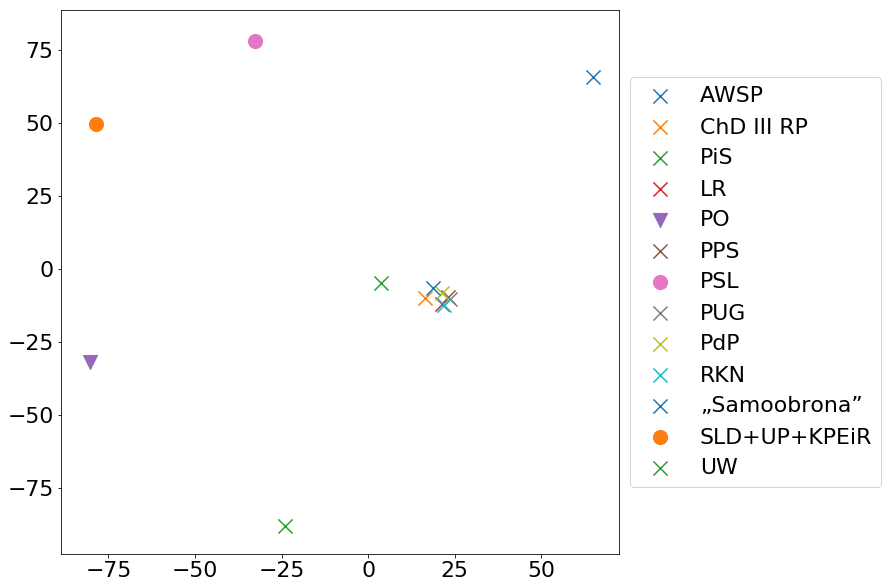

In [507]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
for i,m in enumerate(mm):
    m = mark[parties_Kmeans.labels_[i]]
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 200)
plt.legend(pd_list[no].T.index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

In [363]:
pd_list[no]

,Liga Polskich Rodzin (LPR),Partia Kobiet,Platforma Obywatelska RP (PO RP),Polska Jest Najważniejsza (PJN),Polskie Stronnictwo Ludowe (PSL),Prawo i Sprawiedliwość (PiS),Ruch Poparcia Palikota,Sojusz Lewicy Demokratycznej (SLD),Inna partia,Nie mam takiej partii,Trudno powiedzieć,Ogółem
PO,1,3,0,3,14,4,1,33,4,28,9,100
PSL,3,5,18,0,0,14,0,8,6,34,12,100
PiS,6,3,5,4,8,0,0,11,8,48,7,100
SLD,0,3,37,1,16,7,5,0,4,22,5,100
Pozostałe,7,1,20,3,2,12,6,10,8,31,0,100


In [129]:
embedding = MDS(n_components=2)
MDS_parties = embedding.fit_transform(pd_list[16].iloc[:,0:-3])
mm = ['^','x','o', 'v' ,'s','d']
print(MDS_parties.shape[0])
print(len(mm))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

[]

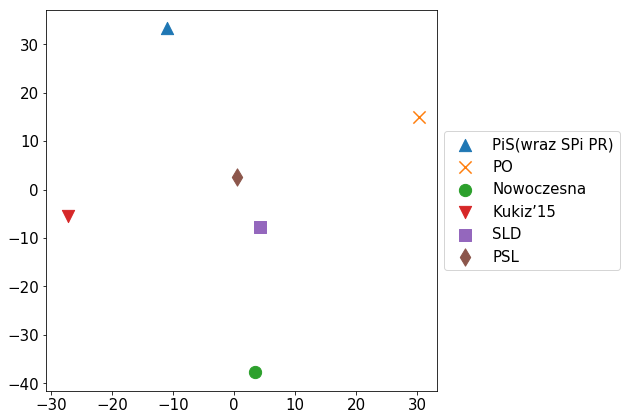

In [88]:
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
for i,m in enumerate(mm):
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 150)
plt.legend(pd_list[16].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

In [89]:
pd_list[5]

Party,ChD III RP,KPEiR,LPR,PD - demokraci.pl,PO,PSL,PiS,Samoobrona,SdPl,SLD,UPR,Inne/pozostałe,"Nie ma takiej partii, trudno powiedzieć",Ogółem
LPR,3,8,0,0,4,3,28,17,0,0,0,18,19,100
PO,0,0,4,9,0,5,45,3,6,3,5,2,18,100
PSL*,0,7,14,6,0,0,14,13,0,0,0,22,24,100
PiS,2,1,21,0,37,3,0,8,0,1,2,2,23,100
Samoobrona,0,4,12,0,6,13,18,0,0,4,5,2,36,100
SdPl*,0,4,0,18,30,0,0,0,0,21,6,3,18,100
SLD,0,6,0,2,11,9,10,6,26,0,0,10,20,100


2004_08.csv


[]

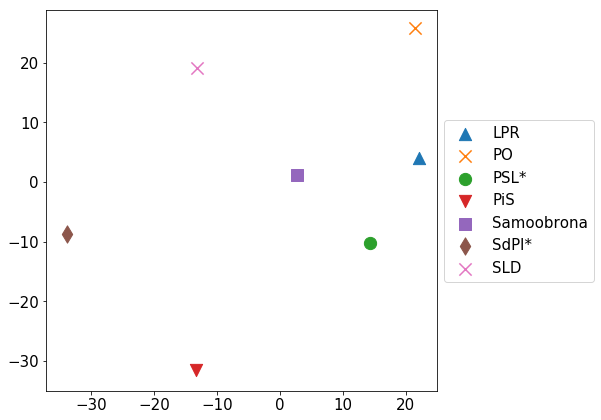

In [108]:
embedding = MDS(n_components=2)
MDS_parties = embedding.fit_transform(pd_list[5].iloc[:,0:-3])
mm = ['^','x','o', 'v' ,'s','d','x']
print(files[5])
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
for i,m in enumerate(mm):
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 150)
plt.legend(pd_list[5].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

2004_06.csv


[]

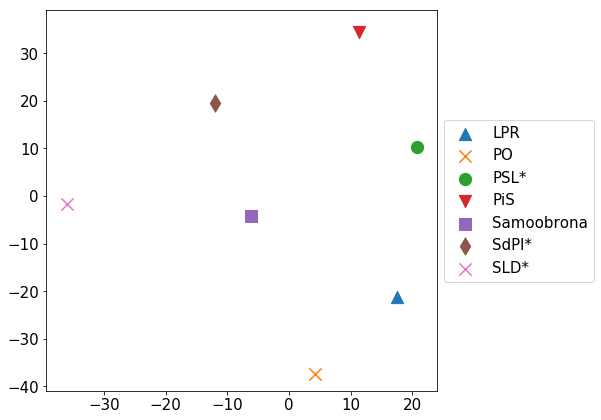

In [111]:
embedding = MDS(n_components=2)
MDS_parties = embedding.fit_transform(pd_list[4].iloc[:,0:-3])
mm = ['^','x','o', 'v' ,'s','d','x']
print(files[4])
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
for i,m in enumerate(mm):
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 150)
plt.legend(pd_list[4].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()